In [9]:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    from sklearn.exceptions import ConvergenceWarning
    from sklearn.metrics import r2_score
    import warnings
    import pandas as pd
    import ast
    import numpy as np
    import os
    import time
    import math   

    # Read in example data set
    cwd = os.getcwd()
    path_data = os.path.join(cwd, '..', 'resources', 'data', 'forecaster_example_data.csv')
    df = pd.read_csv(path_data, index_col = [0])
    df.index = pd.to_datetime(df.index)       

    # Split data set into X and y data sets
    forecast_mode = 'multiple' # 'single' or 'multiple'
#     if forecast_mode == 'single':
#         X_columns = [col for col in df.columns if not 'Ppv_forecast' in col and col.endswith('_1')]
#         X = df[X_columns]
#         y = df['Ppv_forecast_1']
#     else:
    X = df[[col for col in df.columns if not 'Ppv_forecast' in col]]
    y = df[[col for col in df.columns if 'Ppv_forecast' in col]] 
    
    display(X)
    display(y)
    
#     length = len(X.index)
#     print(len(X.index))
#     print(int(0.5 * len(X.index)))
#     print(X.index[int(0.5 * len(X.index))])
    
    X_train = X.loc[X.index[0]:X.index[int(0.8 * len(X.index))]]
    y_train = y.loc[y.index[0]:y.index[int(0.8 * len(y.index))]]
    X_test = X.loc[X.index[int(0.8 * len(X.index))]:X.index[-1]]
    y_test = y.loc[y.index[int(0.8 * len(y.index))]:y.index[-1]]    
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

,Tamb_forecast_1,Tamb_forecast_2,Tamb_forecast_3,Tamb_forecast_4,Tamb_forecast_5,Tamb_forecast_6,Tamb_forecast_7,Tamb_forecast_8,Tamb_forecast_9,Tamb_forecast_10,...,Ppv_dminus1_forecast_14,Ppv_dminus1_forecast_15,Ppv_dminus1_forecast_16,Ppv_dminus1_forecast_17,Ppv_dminus1_forecast_18,Ppv_dminus1_forecast_19,Ppv_dminus1_forecast_20,Ppv_dminus1_forecast_21,Ppv_dminus1_forecast_22,Ppv_dminus1_forecast_23
2018-07-20 23:00:00,16.1,15.6,15.6,15.6,15.0,14.4,14.4,14.4,14.4,15.6,...,2587.353890,2479.181222,2261.350632,1842.861048,1276.015238,569.028976,129.648870,6.450427,0.000000,4.398762
2018-07-21 00:00:00,15.6,15.6,15.6,15.0,14.4,14.4,14.4,14.4,15.6,16.7,...,2479.181222,2261.350632,1842.861048,1276.015238,569.028976,129.648870,6.450427,0.000000,4.398762,3.474860
2018-07-21 01:00:00,15.6,15.6,15.0,14.4,14.4,14.4,14.4,15.6,16.7,18.3,...,2261.350632,1842.861048,1276.015238,569.028976,129.648870,6.450427,0.000000,4.398762,3.474860,0.000000
2018-07-21 02:00:00,15.6,15.0,14.4,14.4,14.4,14.4,15.6,16.7,18.3,20.0,...,1842.861048,1276.015238,569.028976,129.648870,6.450427,0.000000,4.398762,3.474860,0.000000,0.000000
2018-07-21 03:00:00,15.0,14.4,14.4,14.4,14.4,15.6,16.7,18.3,20.0,21.1,...,1276.015238,569.028976,129.648870,6.450427,0.000000,4.398762,3.474860,0.000000,0.000000,1.304373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 20:00:00,15.0,14.4,13.9,13.3,13.3,13.3,13.3,13.3,13.3,12.8,...,1677.294561,1725.466972,2501.236897,2269.228813,1911.615727,1891.566916,1464.919942,826.967654,330.426094,34.708766
2018-08-29 21:00:00,14.4,13.9,13.3,13.3,13.3,13.3,13.3,13.3,12.8,12.8,...,1725.466972,2501.236897,2269.228813,1911.615727,1891.566916,1464.919942,826.967654,330.426094,34.708766,0.000000
2018-08-29 22:00:00,13.9,13.3,13.3,13.3,13.3,13.3,13.3,12.8,12.8,12.8,...,2501.236897,2269.228813,1911.615727,1891.566916,1464.919942,826.967654,330.426094,34.708766,0.000000,0.000000
2018-08-29 23:00:00,13.3,13.3,13.3,13.3,13.3,13.3,12.8,12.8,12.8,13.3,...,2269.228813,1911.615727,1891.566916,1464.919942,826.967654,330.426094,34.708766,0.000000,0.000000,1.320906


,Ppv_forecast_1,Ppv_forecast_2,Ppv_forecast_3,Ppv_forecast_4,Ppv_forecast_5,Ppv_forecast_6,Ppv_forecast_7,Ppv_forecast_8,Ppv_forecast_9,Ppv_forecast_10,...,Ppv_forecast_14,Ppv_forecast_15,Ppv_forecast_16,Ppv_forecast_17,Ppv_forecast_18,Ppv_forecast_19,Ppv_forecast_20,Ppv_forecast_21,Ppv_forecast_22,Ppv_forecast_23
2018-07-20 23:00:00,0.000000,0.000000,1.304373,4.703539,11.268172,2.522124,9.488498,131.287234,344.253630,928.030806,...,2586.524348,2466.131190,2191.011433,1733.403675,1144.791610,462.429508,144.616928,3.234688,0.000000,12.760208
2018-07-21 00:00:00,0.000000,1.304373,4.703539,11.268172,2.522124,9.488498,131.287234,344.253630,928.030806,1288.767675,...,2466.131190,2191.011433,1733.403675,1144.791610,462.429508,144.616928,3.234688,0.000000,12.760208,1.048312
2018-07-21 01:00:00,1.304373,4.703539,11.268172,2.522124,9.488498,131.287234,344.253630,928.030806,1288.767675,2109.302937,...,2191.011433,1733.403675,1144.791610,462.429508,144.616928,3.234688,0.000000,12.760208,1.048312,0.000000
2018-07-21 02:00:00,4.703539,11.268172,2.522124,9.488498,131.287234,344.253630,928.030806,1288.767675,2109.302937,2550.035278,...,1733.403675,1144.791610,462.429508,144.616928,3.234688,0.000000,12.760208,1.048312,0.000000,1.322876
2018-07-21 03:00:00,11.268172,2.522124,9.488498,131.287234,344.253630,928.030806,1288.767675,2109.302937,2550.035278,2586.524348,...,1144.791610,462.429508,144.616928,3.234688,0.000000,12.760208,1.048312,0.000000,1.322876,5.421722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 20:00:00,0.000000,1.320906,0.000000,0.000000,0.000000,0.000000,1.327461,1.345646,0.000000,0.000000,...,710.042912,1005.350732,1210.813040,1912.391214,2296.034456,1917.820778,1463.605638,831.925101,263.982510,13.276272
2018-08-29 21:00:00,1.320906,0.000000,0.000000,0.000000,0.000000,1.327461,1.345646,0.000000,0.000000,41.828733,...,1005.350732,1210.813040,1912.391214,2296.034456,1917.820778,1463.605638,831.925101,263.982510,13.276272,0.000000
2018-08-29 22:00:00,0.000000,0.000000,0.000000,0.000000,1.327461,1.345646,0.000000,0.000000,41.828733,148.550450,...,1210.813040,1912.391214,2296.034456,1917.820778,1463.605638,831.925101,263.982510,13.276272,0.000000,1.297032
2018-08-29 23:00:00,0.000000,0.000000,0.000000,1.327461,1.345646,0.000000,0.000000,41.828733,148.550450,298.030530,...,1912.391214,2296.034456,1917.820778,1463.605638,831.925101,263.982510,13.276272,0.000000,1.297032,0.000000


In [2]:
todt = {
        'name': 'todt',
        'fun': 'time_of_day_temperature',
        'parameter': {
                      'LR': {
                                          },
                      'oat_col_identifier': 'Tamb_forecast',
                      'target_col': 'Ppv_forecast_1',
                      'number_bins': 6
                     },
        'description': '''scikit-learn LinearRegression model with input data 
                       formatted to create individual regressions for each
                       hour of the day.'''
       }  

In [27]:
# MODIFY THIS VERSION TO RETURN MULTI-TARGET PREDICTIONS
# Must be careful when using this forecaster. Large quantities of training data are important.
# -Do not use randomly selected training data sets, as it will yield period with very low numbers of data points
# Test with Camp Parks data 15 minute data. That is a full year's data set

def round_up(n, decimals=0): 
    # Rounds the input to the nearest number of decimals as specified by the user
    multiplier = 10 ** decimals 
    return math.ceil(n * multiplier) / multiplier

class time_of_day_temperature():
    """
    Implement's Rongxin's regression model. Creates a LinearRegression model driven
    by outdoor air temperature for each hour of the day. Must be able to identify
    the columns containing outdoor air temperature, building power, and hour of the
    day, which are specified in the parameters dictionary.
    
    methods:
    fit: Iteratively fits a linear regression model to the data set for each
         hour of the day. Stores the parameters in a dataframe for later use
         predicting.
    predict: Iteratively predicts the building's power consumption for each
             hour of the day. References the dataframe of parameters stored
             when fitting.
    score: Calculates the r2 value of the model by comparing predictions
           to the provided real y data.
    """
    
    def __init__(self, **args):
        '''
        Initializes the model by reading the parameters from the args dictionary.
        The required arguments are described in the inputs.
        
        Inputs:
        oat_col: The name of the dataframe column containing ambient air temperature
                 data.
        power_col: The name of the dataframe column containing the building's electric
                   power consumption data.
        '''
        
        self.args = args        
        
    def format_data(self, X, caller):#:, oat_col = 'temp'):
        '''
        This function pre-processes a data set to provide the right
        inputs for the linear regression process. It 1) Creates the
        bins used in the piecewise linear regression, and 2) Splits
        the data into X and y data sets.
        
        The algorithm must be able to locate the outdoor air temperature
        column to perform the analysis.
        
        inputs:
        X: A dataframe containing the data set to be used in the
              analysis. Must include outdoor air temperature, time of
              week, and power.
        caller: The name of the function calling format_data. There is
                specific logic to execute only when called by .fit().
        temp_col: The name of the column containing the outdoor air
                  temperature.
        '''

        X_formatted = X.copy(deep=True)

        # Make Time of Week column
        X_formatted['Time of Week (hr)'] = X_formatted.index.dayofweek * 24 + X_formatted.index.hour
        self.time_col = 'Time of Week (hr)'
        self.oat_col = [col for col in X_formatted.columns if self.args['oat_col_identifier'] in col][0]
        X_formatted = X_formatted[[self.oat_col, self.time_col]]

        if caller == 'fit':
            
            self.oat_max = X_formatted[self.oat_col].max()
            self.oat_min = X_formatted[self.oat_col].min()
            self.oat_range = self.oat_max - self.oat_min
            self.bin_size = round_up(self.oat_range/self.args['number_bins'], 1)

        for i in range(0, self.args['number_bins']):
            col = self.oat_min + i * self.bin_size
            X_formatted['{}'.format(col)] = np.maximum(0, np.minimum(self.bin_size, X_formatted[self.oat_col] - col)) 
        del X_formatted[self.oat_col]
            
        return X_formatted        
        
    def fit(self, X, y):
        """
        Iteratively creates a linear regression model for each hour of the day and stores
        the coefficients for that model in a dataframe.
        
        Inputs:
        X : The features data set.
        y: The targets data set.
        """

        from sklearn.linear_model import LinearRegression
                    
        X_fit = X.copy(deep = True)
        X_fit = self.format_data(X=X_fit, caller = 'fit')
        y_fit = y[self.args['target_col']]

        empty = []
        self.models = {}
        for hour in range(0, X_fit['Time of Week (hr)'].max()+1):

            X_hr = X_fit.loc[(X_fit['Time of Week (hr)'] == hour)]
            y_hr = y_fit.loc[X_hr.index]

            if len(X_hr.index) == 0:
                empty.append(hour)
                self.models[hour] = None
            elif len(y_hr.index) == 0:
                empty.append(hour)
                self.models[hour] = None
            else:
                model = LinearRegression()
                self.models[hour] = model.fit(X_hr, y_hr)
        if len(empty) > 0:
            print('WANRING: No data for hours {}'.format(empty)) 

    def predict(self, X):
        '''
        Predicts the system response for the given X data. Returns the values
        predicted for the given data set.
        
        Inputs:
        X: The features data set for which predictions are desired.
        
        Outputs:
        Returns the values predicted for the given X data set.
        '''
                    
        result = pd.DataFrame(index = X.index)
        predict_cols = [col for col in X.columns if self.args['oat_col_identifier'] in col]
        X = X[predict_cols]
        for col in X.columns:
            temp = pd.DataFrame(index = X.index, columns = [col])
            temp[col] = X[col]

            temp = temp.rename(columns = {col: self.oat_col})
            X_predict = self.format_data(X=temp, caller = 'predict')

            for row in X_predict.index:
                hour = X_predict.loc[row, 'Time of Week (hr)']
                X_temp = pd.DataFrame(columns = X_predict.columns)
                X_temp.loc[row] = X_predict.loc[row]
                try:
                    prediction = self.models[hour].predict(X_temp)
                except Exception as e:
                    print('error: {}'.format(e))
                    prediction = 0
                result.loc[row, col] = prediction

        result = result.fillna(0)
        return(result.values)
    
    def score(self, X, y):
        '''
        Returns the r2 value comparing the predictions for the given X data set to
        the provided y data set.
        
        Inputs:
        X: The features data set.
        y: The corresponding target data set.
        '''
        
        pred = self.predict(X)

        score = r2_score(y, pred)
        
        return score 
todt = {
        'name': 'todt',
        'fun': 'time_of_day_temperature',
        'parameter': {
                      'LR': {
                                          },
                      'oat_col_identifier': 'Tamb_forecast',
                      'target_col': 'Ppv_forecast_1',
                      'number_bins': 6
                     },
        'description': '''scikit-learn LinearRegression model with input data 
                       formatted to create individual regressions for each
                       hour of the day.'''
       }      

In [29]:
model = time_of_day_temperature(**todt['parameter'])
model.fit(X_train, y_train)
# predict = model.predict(X_test)
# print(predict)
# temp = pd.DataFrame(index = X_test.index, columns = ['predict', 'y'])
# temp['predict'] = predict
# temp['y'] = y['Ppv_forecast_1']
# display(temp)
y_test = y_test['Ppv_forecast_1']
score = model.score(X_test, y_test)
print(score)

0.6774323830030238


In [19]:
display(predict)

array([[ 1.51672079e+03,  1.07607936e+03,  9.29198885e+02, ...,
         2.83864507e+03,  2.83864507e+03,  2.83864507e+03],
       [ 2.27468726e+03,  2.60687219e+03,  2.51842300e+03, ...,
        -2.00100203e+03, -2.00100203e+03, -1.82284831e+03],
       [ 2.35511209e+03,  2.51227267e+03,  2.59799663e+03, ...,
         2.31225011e+03,  2.31225011e+03,  2.31225011e+03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.18274708e-01,  4.18274708e-01,  4.18274708e-01, ...,
         6.84449522e-02,  3.27014772e-01,  4.44089210e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

(0.0, 4000.0)

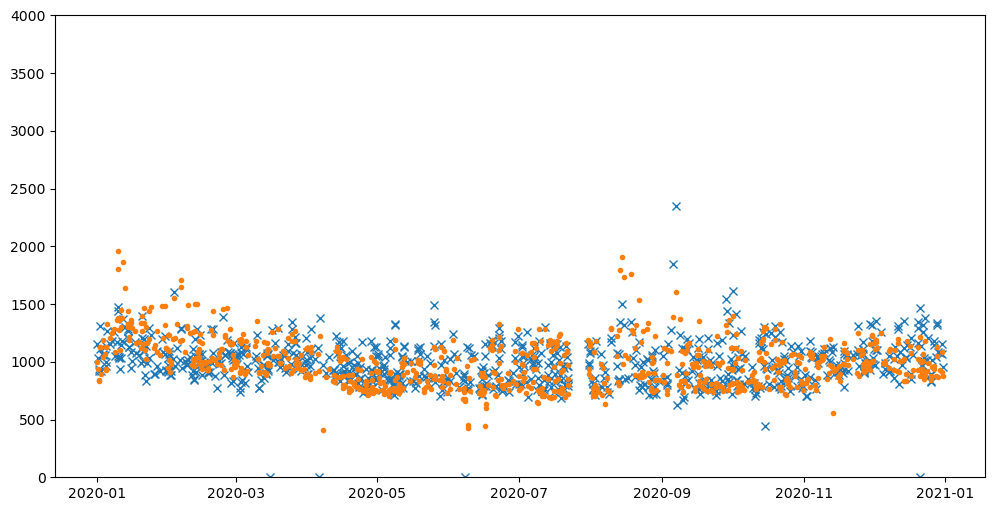

In [229]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 6))
plt.plot(temp['predict'], linestyle = '', marker = 'x')
plt.plot(temp['y'], linestyle = '', marker = '.')
plt.ylim([0, 4000])

In [102]:
class time_of_week_temperature():
    """
    Implement's Rongxin's regression model. Creates a LinearRegression model driven
    by outdoor air temperature for each hour of the day. Must be able to identify
    the columns containing outdoor air temperature, building power, and hour of the
    day, which are specified in the parameters dictionary.
    
    methods:
    fit: Iteratively fits a linear regression model to the data set for each
         hour of the day. Stores the parameters in a dataframe for later use
         predicting.
    predict: Iteratively predicts the building's power consumption for each
             hour of the day. References the dataframe of parameters stored
             when fitting.
    score: Calculates the r2 value of the model by comparing predictions
           to the provided real y data.
    """
    
    def __init__(self, **args):
        '''
        Initializes the model by reading the parameters from the args dictionary.
        The required arguments are described in the inputs.
        
        Inputs:
        oat_col: The name of the dataframe column containing ambient air temperature
                 data.
        power_col: The name of the dataframe column containing the building's electric
                   power consumption data.
        '''
        
        self.args = args
#         self.args_lr = args['LR']
#         self.oat_col = args['oat_col']
        self.params = pd.DataFrame(columns=['hour', 'a', 'b'])
        
    def fit(self, X, y):
        """
        Iteratively creates a linear regression model for each hour of the day and stores
        the coefficients for that model in a dataframe.
        
        Inputs:
        X : The features data set.
        y: The targets data set.
        """

        from sklearn.linear_model import LinearRegression  
                    
        X = X.copy(deep = True)
        X['hour'] = X.index.hour
        oat_col = [col for col in X.columns if self.args['oat_col_identifier'] in col][0]
        X = X[[oat_col, 'hour']]
        y = y[self.args['target_col']]
        empty = []
        
        for hour in range(24):

            X_hr = X.loc[(X.index.hour == hour)]
            y_hr = y.loc[y.index.hour == hour]

            if len(X_hr.index) == 0:
                empty.append(hour)
                self.params.loc[hour] = [hour, 0, 0]
            elif len(y_hr.index) == 0:
                empty.append(hour)
                self.params.loc[hour] = [hour, 0, 0]
            else:
                model = LinearRegression(**self.args['LR'])
                model.fit(X_hr, y_hr)

                self.params.loc[hour] = [hour, model.intercept_, model.coef_[0]]
        if len(empty) > 0:
            print('WANRING: No data for hours {}'.format(empty))
        print(self.params)
    def predict(self, X):
        '''
        Predicts the system response for the given X data. Returns the values
        predicted for the given data set.
        
        Inputs:
        X: The features data set for which predictions are desired.
        
        Outputs:
        Returns the values predicted for the given X data set.
        '''

        result = pd.DataFrame(index = X.index)
                    
        X = X.copy(deep = True)
        columns = [col for col in X.columns if self.args['oat_col_identifier'] in col]
        X['hour'] = X.index.hour
        columns.append('hour')
        X = X[columns]
        
        for hour in range(24):
            X_hr = X.loc[(X['hour'] == hour)]
            for col in columns:
                if col == 'hour':
                    continue
                a = self.params.loc[hour, 'a']
                b = self.params.loc[hour, 'b']
                pred = a + b * X_hr[col]
                result.loc[pred.index, col] = pred

        return(result.values)
    
    def score(self, X, y):
        '''
        Returns the r2 value comparing the predictions for the given X data set to
        the provided y data set.
        
        Inputs:
        X: The features data set.
        y: The corresponding target data set.
        '''
        
        pred = self.predict(X)
        
        score = r2_score(y, pred)
        return score  
    


In [88]:
towt = {
        'name': 'towt',
        'fun': 'time_of_week_temperature',
        'parameter': {
                      'LR': {
                                          },
                      'oat_col_identifier': 'Tamb_forecast',
                      'target_col': 'Ppv_forecast_1',
                      'number_bins': 6
                     },
        'description': '''scikit-learn LinearRegression model with input data 
                       formatted to create individual regressions for each
                       hour of the day.'''
       }  

In [103]:
model = time_of_week_temperature(**towt['parameter'])
model.fit(X_train, y_train)
predict = model.predict(X_test)
display(predict)
print(predict.shape)
print(y_test.shape)

# temp = pd.DataFrame(index = X_test.index, columns = ['predict', 'y'])
# temp['predict'] = predict
# temp['y'] = y['Ppv_forecast_1']
# display(temp)

score = model.score(X_test, y_test)
print(score)

    hour            a           b
0    0.0     7.671200   -0.526753
1    1.0     1.210462    0.001463
2    2.0    -4.328108    0.439703
3    3.0    -9.916004    0.879441
4    4.0    -2.013014    0.214114
5    5.0    33.043330   -2.122988
6    6.0   293.561101  -16.839332
7    7.0   491.490115  -12.652982
8    8.0   900.640386    0.845498
9    9.0   727.539199   54.703489
10  10.0 -1383.527029  207.837606
11  11.0 -1301.515976  195.085334
12  12.0 -1161.468718  176.476357
13  13.0   962.620063   64.159723
14  14.0  1485.284044   25.928782
15  15.0  -266.642333   87.022682
16  16.0  -988.306228   96.046507
17  17.0  -749.872216   59.622570
18  18.0  -231.283280   15.674836
19  19.0    -0.802810    0.325130
20  20.0    11.506587   -0.481783
21  21.0    -7.681628    0.717231
22  22.0     1.186167   -0.019223
23  23.0     0.524317    0.063829


array([[ 376.99435651,  341.22081453,  210.05116059, ...,  311.40952954,
         341.22081453,  376.99435651],
       [1785.68644367, 1785.68644367, 1873.92462215, ..., 1379.79082265,
        1485.67663683, 1679.80062949],
       [2089.42466994, 2089.42466994, 2089.42466994, ..., 1975.33802818,
        2019.41695795, 2076.46027883],
       ...,
       [2262.17260748, 2473.94423583, 2562.18241432, ..., 1097.4286515 ,
        1291.55264416, 1679.80062949],
       [1473.81130796, 1421.59769873, 1325.87274848, ..., 1186.63645721,
        1282.36140746, 1325.87274848],
       [   3.50717701,    3.07683834,    2.64649967, ...,    7.09333262,
           6.23265527,    5.44370104]])

(200, 23)
(200, 23)
-0.7188285584104745


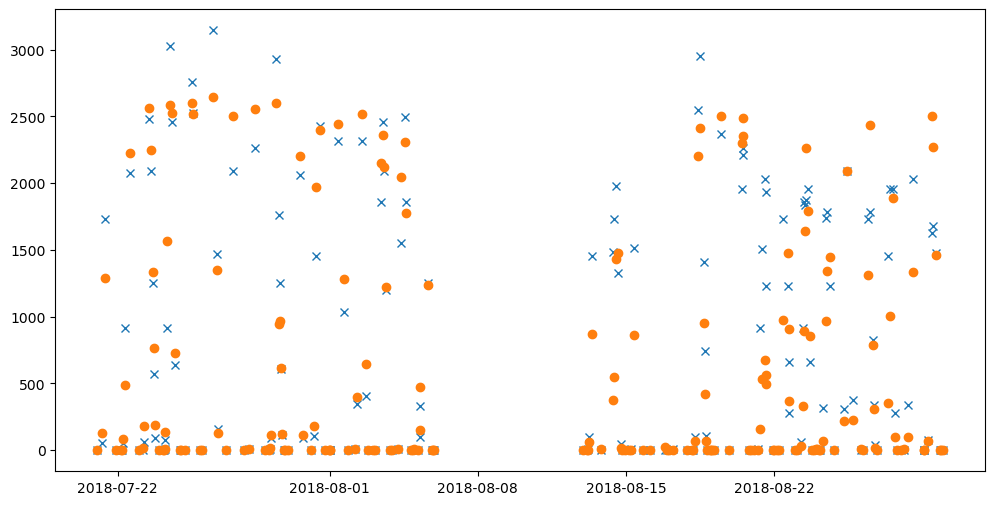

In [70]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 6))
plt.plot(temp['predict'], linestyle = '', marker = 'x')
plt.plot(temp['y'], linestyle = '', marker = 'o')

In [149]:
class time_of_day_temperature():
    """
    Implement's Rongxin's regression model. Creates a LinearRegression model driven
    by outdoor air temperature for each hour of the day. Must be able to identify
    the columns containing outdoor air temperature, building power, and hour of the
    day, which are specified in the parameters dictionary.
    
    methods:
    fit: Iteratively fits a linear regression model to the data set for each
         hour of the day. Stores the parameters in a dataframe for later use
         predicting.
    predict: Iteratively predicts the building's power consumption for each
             hour of the day. References the dataframe of parameters stored
             when fitting.
    score: Calculates the r2 value of the model by comparing predictions
           to the provided real y data.
    """
    
    def __init__(self, **args):
        '''
        Initializes the model by reading the parameters from the args dictionary.
        The required arguments are described in the inputs.
        
        Inputs:
        oat_col: The name of the dataframe column containing ambient air temperature
                 data.
        power_col: The name of the dataframe column containing the building's electric
                   power consumption data.
        '''
        
        self.args = args        
        self.oat_col = args['oat_col']
        self.intercept = pd.DataFrame()
        self.slope = pd.DataFrame()
        
    def fit(self, X, y):
        """
        Iteratively creates a linear regression model for each hour of the day and stores
        the coefficients for that model in a dataframe.
        
        Inputs:
        X : The features data set.
        y: The targets data set.
        """

        from sklearn.linear_model import LinearRegression
                    
        X = X.copy(deep = True)
        X['hour'] = X.index.hour
        cols = [col for col in X.columns if self.args['oat_col'] in col]
        cols.append('hour')
        X = X[cols]

        empty = []

        for hour in range(24):
    
            X_hr = X.loc[(X.index.hour == hour)]
            y_hr = y.loc[y.index.hour == hour]

            for ix in range(X_hr.shape[1]):
                if X_hr.columns[ix] == 'hour':
                    continue
                X_temp = X_hr[[X_hr.columns[ix], 'hour']]
                y_temp = y_hr[[y_hr.columns[ix]]]
                if len(X_hr.index) == 0:
                    empty.append(hour)
                    self.intercept.loc[hour] = [hour, 0, 0]
                    self.slope.loc[hour] = [hour, 0, 0]
                elif len(y_hr.index) == 0:
                    empty.append(hour)
                    self.intercept.loc[hour] = [hour, 0, 0]
                    self.slope.loc[hour] = [hour, 0, 0]                
                else:
                    model = LinearRegression()
                    model.fit(X_temp, y_temp)
                    self.intercept.loc[hour, ix] = model.intercept_[0]
                    self.slope.loc[hour, ix] = model.coef_[0][0]
        if len(empty) > 0:
            print('WANRING: No data for hours {}'.format(empty)) 

    def predict(self, X):
        '''
        Predicts the system response for the given X data. Returns the values
        predicted for the given data set.
        
        Inputs:
        X: The features data set for which predictions are desired.
        
        Outputs:
        Returns the values predicted for the given X data set.
        '''

        result = pd.DataFrame(index = X.index)
                    
        X = X.copy(deep = True)
        X['hour'] = X.index.hour
        cols = [col for col in X.columns if self.args['oat_col'] in col]
        cols.append('hour')
        X = X[cols]

        result = pd.DataFrame(index = X.index)
        for row in X.index:
    
            hour = row.hour
    
            for col in range(X.shape[1]):
                if X.columns[col] == 'hour':
                    continue
            
                b = self.intercept.loc[hour, col]
                m = self.slope.loc[hour, col]
                prediction = b + m * X.loc[row, X.columns[col]]
                result.loc[row, col] = prediction

        return(result.values)
    
    def score(self, X, y):
        '''
        Returns the r2 value comparing the predictions for the given X data set to
        the provided y data set.
        
        Inputs:
        X: The features data set.
        y: The corresponding target data set.
        '''
        
        pred = self.predict(X)
        score = r2_score(y, pred)
        
        return score

In [150]:
todt = {
        'name': 'todt',
        'fun': 'time_of_day_temperature',
        'parameter': {
                      'LR': {
                                          },
                      'oat_col': 'Tamb_forecast',
                     },
        'description': '''scikit-learn LinearRegression model with input data 
                       formatted to create individual regressions for each
                       hour of the day.'''
       }

In [151]:
# X_train.index = pd.to_datetime(X_train.index)
model = time_of_day_temperature(**todt['parameter'])
model.fit(X_train, y_train)
predict = model.predict(X_test)
display(predict)
display(y_test.values)
# print(predict.shape)
# print(y_test.shape)

# # temp = pd.DataFrame(index = X_test.index, columns = ['predict', 'y'])
# # temp['predict'] = predict
# # temp['y'] = y['Ppv_forecast_1']
# # display(temp)

score = model.score(X_test, y_test)
print(score)

array([[3.76994357e+02, 5.70081491e+01, 2.18888227e+00, ...,
        1.97505825e+03, 1.74355191e+03, 1.34669541e+03],
       [1.78568644e+03, 1.68518900e+03, 1.67417991e+03, ...,
        1.04533579e+03, 1.66486271e+03, 1.94478915e+03],
       [2.08942467e+03, 1.68062133e+03, 1.16557871e+03, ...,
        2.79073616e+03, 2.74981770e+03, 2.69455107e+03],
       ...,
       [2.26217261e+03, 2.19755826e+03, 1.98339318e+03, ...,
        9.95107038e+02, 1.51498730e+03, 1.94478915e+03],
       [1.47381131e+03, 8.95179284e+02, 3.49359300e+02, ...,
        1.93912943e+03, 1.95962452e+03, 1.93613270e+03],
       [3.50717701e+00, 1.46240729e+00, 1.39424697e+00, ...,
        5.00456132e+02, 7.31744588e+01, 4.73667441e+00]])

array([[ 223.253083  ,    7.79688439,    2.66666381, ..., 2025.099398  ,
        2065.236898  , 1239.017927  ],
       [1342.624769  , 2093.527107  , 1809.634226  , ...,  727.0414756 ,
        1459.642878  , 2090.050012  ],
       [2247.400502  , 1885.63213   , 1337.943629  , ..., 2418.419224  ,
        2584.910208  , 2618.643897  ],
       ...,
       [2556.459159  , 2387.760669  , 2015.228238  , ...,  974.2092469 ,
        2029.13268   , 2363.815867  ],
       [1464.919942  ,  826.9676538 ,  330.4260942 , ..., 1210.81304   ,
        1912.391214  , 2296.034456  ],
       [   0.        ,    0.        ,    0.        , ...,  100.4360922 ,
           4.42203743,    0.        ]])

0.8980982973845009


In [148]:
display(y_test)

,Ppv_forecast_1,Ppv_forecast_2,Ppv_forecast_3,Ppv_forecast_4,Ppv_forecast_5,Ppv_forecast_6,Ppv_forecast_7,Ppv_forecast_8,Ppv_forecast_9,Ppv_forecast_10,...,Ppv_forecast_14,Ppv_forecast_15,Ppv_forecast_16,Ppv_forecast_17,Ppv_forecast_18,Ppv_forecast_19,Ppv_forecast_20,Ppv_forecast_21,Ppv_forecast_22,Ppv_forecast_23
2018-08-25 17:00:00,223.253083,7.796884,2.666664,2.255780,2.637865,0.000000,0.000000,2.319528,0.000000,11.328917,...,23.367651,165.856816,402.645148,648.644747,1311.713930,1520.748796,2432.094588,2025.099398,2065.236898,1239.017927
2018-08-24 12:00:00,1342.624769,2093.527107,1809.634226,1444.776856,607.143521,139.016522,12.284071,0.000000,5.372186,2.610077,...,3.160418,4.017540,0.000000,0.000000,0.000000,41.642434,220.576235,727.041476,1459.642878,2090.050012
2018-07-23 14:00:00,2247.400502,1885.632130,1337.943629,763.181439,185.871750,3.898855,1.562917,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.516782,135.500964,604.173527,1566.698748,2126.785128,2418.419224,2584.910208,2618.643897
2018-08-19 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.870533,371.466849,997.334207,1990.683709,...,2349.133011,2027.528285,1585.528347,1043.964147,375.176872,52.471528,21.457496,2.580638,0.000000,0.000000
2018-07-23 17:00:00,763.181439,185.871750,3.898855,1.562917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,135.500964,604.173527,1566.698748,2126.785128,2418.419224,2584.910208,2618.643897,2526.653531,2264.289243,1887.648385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-24 17:00:00,730.445693,132.274168,2.891439,0.000000,1.898007,0.000000,0.000000,0.000000,0.000000,0.000000,...,249.468011,430.392797,1563.726209,2140.080686,2404.037632,2554.893036,2599.588492,2520.861054,2250.349111,1877.666331
2018-08-23 19:00:00,5.246563,15.794835,0.000000,0.000000,10.147128,7.956600,0.000000,0.000000,0.000000,0.000000,...,224.627192,402.839774,528.483420,967.787060,1342.624769,2093.527107,1809.634226,1444.776856,607.143521,139.016522
2018-07-28 12:00:00,2556.459159,2387.760669,2015.228238,1734.480115,1199.881601,764.480591,121.611205,3.885469,3.883871,11.464979,...,0.000000,3.095256,0.000000,0.000000,13.895635,111.880734,514.217335,974.209247,2029.132680,2363.815867
2018-08-29 15:00:00,1464.919942,826.967654,330.426094,34.708766,0.000000,0.000000,1.320906,0.000000,0.000000,0.000000,...,0.000000,0.000000,41.828733,148.550450,298.030530,710.042912,1005.350732,1210.813040,1912.391214,2296.034456


In [22]:
path_data = os.path.join(os.getcwd(), '..', 'resources', 'Camp Parks Data', 'training data', 'Parks_2020_training_data_METER_15min.csv')
df = pd.read_csv(path_data, index_col = 'datetime')
df.index = pd.to_datetime(df.index)
df = df[~df.index.duplicated(keep='first')]
df = df.drop(columns = ['1010410390'])
df = df.dropna()
display(df)

X = pd.DataFrame(index = df.index, columns = ['Tamb_forecast_1'])

X['Tamb_forecast_1'] = df['temperature']

cols = [col for col in df.columns if col.startswith('10')]
y = df[cols]
y['Ppv_forecast_1'] = y.sum(axis = 1)


display(X)
display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state = 42)

# X_train = X.loc[X.index[0]:X.index[int(0.8 * len(X.index))]]
# y_train = y.loc[y.index[0]:y.index[int(0.8 * len(y.index))]]
# X_test = X.loc[X.index[int(0.8 * len(X.index))]:X.index[-1]]
# y_test = y.loc[y.index[int(0.8 * len(y.index))]:y.index[-1]]   

display(X_train)
display(y_train)

,Unnamed: 0,timestamp,1004578059,1006706934,1006715799,1006716429,1006727093,1006727361,1008913626,1009074083,...,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windBearing,visibility,cloudCover,pressure
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:15:00,0,1577866500,532.2,19.84,1.60,13.12,44.16,3.84,0.760,0.1460,...,0.00,9.10,8.49,2.43,0.63,1.63,276,16.093,0.05,1020.3
2020-01-01 00:30:00,1,1577867400,530.4,20.16,1.92,12.80,43.52,5.76,0.756,0.1456,...,0.00,9.10,8.49,2.43,0.63,1.63,276,16.093,0.05,1020.3
2020-01-01 00:45:00,2,1577868300,536.4,19.52,1.92,13.12,42.88,5.44,0.756,0.1648,...,0.00,9.10,8.49,2.43,0.63,1.63,276,16.093,0.05,1020.3
2020-01-01 01:00:00,3,1577869200,550.8,19.84,1.60,12.80,45.44,4.16,0.760,0.1624,...,0.00,8.88,8.13,3.46,0.69,1.74,283,15.693,0.15,1021.7
2020-01-01 01:15:00,4,1577870100,558.6,19.52,1.60,13.12,44.16,4.48,0.760,0.1460,...,0.00,8.88,8.13,3.46,0.69,1.74,283,15.693,0.15,1021.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 23:00:00,35035,1609398000,480.6,21.12,1.28,36.48,59.52,6.40,1.272,0.1528,...,0.31,9.49,7.73,7.81,0.89,3.29,224,15.623,0.92,1023.0
2020-12-30 23:15:00,35036,1609398900,475.8,21.44,1.28,38.08,53.12,2.24,1.276,0.1344,...,0.31,9.49,7.73,7.81,0.89,3.29,224,15.623,0.92,1023.0
2020-12-30 23:30:00,35037,1609399800,460.2,21.44,1.28,38.40,55.68,2.56,1.272,0.1268,...,0.31,9.49,7.73,7.81,0.89,3.29,224,15.623,0.92,1023.0


C:\Users\Peter\AppData\Local\Temp\ipykernel_18628\123830893.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Ppv_forecast_1'] = y.sum(axis = 1)


,Tamb_forecast_1
datetime,
2020-01-01 00:15:00,9.10
2020-01-01 00:30:00,9.10
2020-01-01 00:45:00,9.10
2020-01-01 01:00:00,8.88
2020-01-01 01:15:00,8.88
...,...
2020-12-30 23:00:00,9.49
2020-12-30 23:15:00,9.49
2020-12-30 23:30:00,9.49


,1004578059,1006706934,1006715799,1006716429,1006727093,1006727361,1008913626,1009074083,1009511425,1009540871,1009984043,1009984060,1010054507,1010086328,1010249061,1010282897,1010397607,1010409824,Ppv_forecast_1
datetime,,,,,,,,,,,,,,,,,,,
2020-01-01 00:15:00,532.2,19.84,1.60,13.12,44.16,3.84,0.760,0.1460,29.44,6.72,5.708,26.476,12.16,82.24,50.4,28.80,0.0260,10.88,868.5160
2020-01-01 00:30:00,530.4,20.16,1.92,12.80,43.52,5.76,0.756,0.1456,30.08,6.72,5.628,24.652,12.16,77.76,67.2,28.80,0.0260,16.00,884.4876
2020-01-01 00:45:00,536.4,19.52,1.92,13.12,42.88,5.44,0.756,0.1648,28.16,6.72,5.452,26.784,10.88,78.08,45.6,28.80,0.0256,16.00,866.7024
2020-01-01 01:00:00,550.8,19.84,1.60,12.80,45.44,4.16,0.760,0.1624,29.44,7.20,5.172,26.376,12.16,78.72,67.2,28.80,0.0260,16.00,906.6564
2020-01-01 01:15:00,558.6,19.52,1.60,13.12,44.16,4.48,0.760,0.1460,28.80,7.20,5.332,24.800,11.20,82.56,54.0,29.12,0.0264,11.52,896.9444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 23:00:00,480.6,21.12,1.28,36.48,59.52,6.40,1.272,0.1528,24.32,11.04,4.108,29.984,13.76,82.24,54.0,28.48,0.1416,65.28,920.1784
2020-12-30 23:15:00,475.8,21.44,1.28,38.08,53.12,2.24,1.276,0.1344,23.68,11.52,4.268,29.880,13.44,81.60,40.8,28.16,0.1416,71.04,897.9000
2020-12-30 23:30:00,460.2,21.44,1.28,38.40,55.68,2.56,1.272,0.1268,23.04,10.56,4.204,30.056,13.76,78.08,45.6,28.80,0.1424,72.32,887.5212


,Tamb_forecast_1
datetime,
2020-04-21 06:45:00,9.87
2020-06-30 20:45:00,20.46
2020-01-14 23:45:00,5.64
2020-04-06 23:00:00,6.36
2020-05-22 14:00:00,21.70
...,...
2020-06-25 01:45:00,14.75
2020-03-06 10:00:00,12.07
2020-04-27 19:15:00,20.91


,1004578059,1006706934,1006715799,1006716429,1006727093,1006727361,1008913626,1009074083,1009511425,1009540871,1009984043,1009984060,1010054507,1010086328,1010249061,1010282897,1010397607,1010409824,Ppv_forecast_1
datetime,,,,,,,,,,,,,,,,,,,
2020-04-21 06:45:00,498.0,21.44,8.00,24.96,44.16,1.92,0.428,0.2460,50.56,5.76,4.780,22.352,9.28,76.48,100.8,29.12,0.0260,21.12,919.4320
2020-06-30 20:45:00,469.2,27.52,1.60,19.20,48.00,3.20,0.508,0.1388,44.80,13.92,4.784,8.832,9.60,101.44,21.6,7.36,0.0252,17.92,799.6480
2020-01-14 23:45:00,809.4,20.48,6.72,14.08,34.56,8.64,0.760,0.1460,28.80,6.72,6.252,24.596,10.56,80.96,37.2,28.16,0.0264,16.00,1134.0604
2020-04-06 23:00:00,665.4,19.52,5.44,13.12,40.32,8.00,0.900,0.2792,27.52,5.76,5.412,25.088,13.76,78.72,42.0,31.36,0.0260,12.16,994.7852
2020-05-22 14:00:00,484.2,24.64,1.92,17.28,38.40,4.48,0.384,0.1448,57.60,9.12,3.848,6.312,11.52,104.64,96.0,25.92,0.0240,16.00,902.4328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25 01:45:00,483.6,21.76,1.28,18.56,38.40,1.60,1.068,0.1360,42.88,8.64,3.400,21.120,8.96,98.56,22.8,7.36,0.0256,10.24,790.3896
2020-03-06 10:00:00,660.6,28.16,11.52,22.72,56.96,7.04,0.476,0.1448,72.96,4.80,4.180,14.988,11.84,122.56,87.6,23.04,0.0256,21.76,1151.3744
2020-04-27 19:15:00,447.0,18.56,1.92,18.24,37.76,4.80,0.424,0.2388,42.24,9.60,3.428,5.596,5.76,103.04,22.8,24.00,0.0248,16.00,761.4316


In [23]:
X_test[X_test.index.duplicated(keep=False)]

,Tamb_forecast_1
datetime,


In [24]:
display(X_train)

,Tamb_forecast_1
datetime,
2020-04-21 06:45:00,9.87
2020-06-30 20:45:00,20.46
2020-01-14 23:45:00,5.64
2020-04-06 23:00:00,6.36
2020-05-22 14:00:00,21.70
...,...
2020-06-25 01:45:00,14.75
2020-03-06 10:00:00,12.07
2020-04-27 19:15:00,20.91


In [25]:
display(y_train)

,1004578059,1006706934,1006715799,1006716429,1006727093,1006727361,1008913626,1009074083,1009511425,1009540871,1009984043,1009984060,1010054507,1010086328,1010249061,1010282897,1010397607,1010409824,Ppv_forecast_1
datetime,,,,,,,,,,,,,,,,,,,
2020-04-21 06:45:00,498.0,21.44,8.00,24.96,44.16,1.92,0.428,0.2460,50.56,5.76,4.780,22.352,9.28,76.48,100.8,29.12,0.0260,21.12,919.4320
2020-06-30 20:45:00,469.2,27.52,1.60,19.20,48.00,3.20,0.508,0.1388,44.80,13.92,4.784,8.832,9.60,101.44,21.6,7.36,0.0252,17.92,799.6480
2020-01-14 23:45:00,809.4,20.48,6.72,14.08,34.56,8.64,0.760,0.1460,28.80,6.72,6.252,24.596,10.56,80.96,37.2,28.16,0.0264,16.00,1134.0604
2020-04-06 23:00:00,665.4,19.52,5.44,13.12,40.32,8.00,0.900,0.2792,27.52,5.76,5.412,25.088,13.76,78.72,42.0,31.36,0.0260,12.16,994.7852
2020-05-22 14:00:00,484.2,24.64,1.92,17.28,38.40,4.48,0.384,0.1448,57.60,9.12,3.848,6.312,11.52,104.64,96.0,25.92,0.0240,16.00,902.4328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25 01:45:00,483.6,21.76,1.28,18.56,38.40,1.60,1.068,0.1360,42.88,8.64,3.400,21.120,8.96,98.56,22.8,7.36,0.0256,10.24,790.3896
2020-03-06 10:00:00,660.6,28.16,11.52,22.72,56.96,7.04,0.476,0.1448,72.96,4.80,4.180,14.988,11.84,122.56,87.6,23.04,0.0256,21.76,1151.3744
2020-04-27 19:15:00,447.0,18.56,1.92,18.24,37.76,4.80,0.424,0.2388,42.24,9.60,3.428,5.596,5.76,103.04,22.8,24.00,0.0248,16.00,761.4316


In [26]:
display(X_test)

,Tamb_forecast_1
datetime,
2020-03-09 04:30:00,7.70
2020-06-01 10:00:00,18.44
2020-11-19 17:15:00,13.47
2020-04-30 14:00:00,22.42
2020-09-28 21:15:00,27.22
...,...
2020-03-13 14:30:00,18.24
2020-10-02 14:30:00,33.38
2020-04-24 04:15:00,11.68
